<a href="https://colab.research.google.com/github/WendyParra/Inteligencia-Artificial-Parra/blob/main/Adeline_Tarea_PARRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-fdfde0b51b72>:33: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data', header=None, delim_whitespace=True)


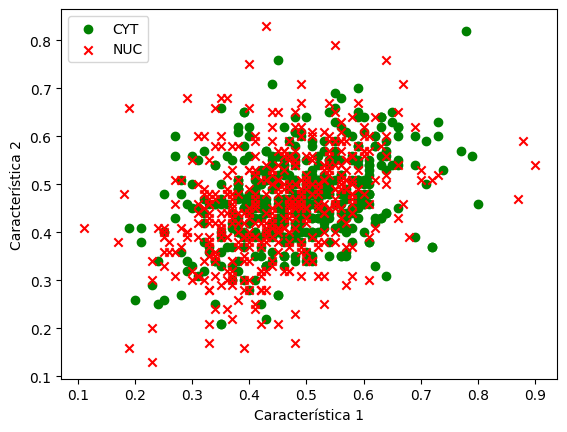

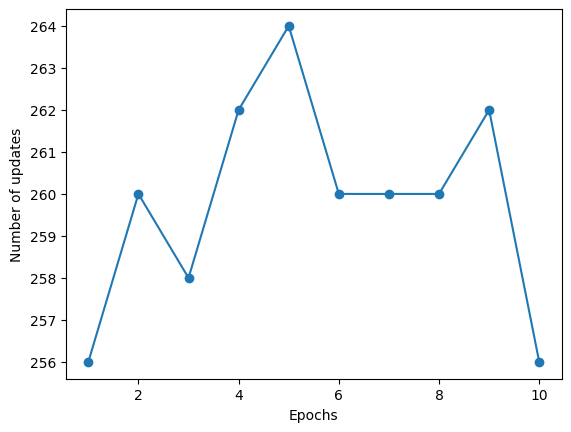

<ipython-input-3-fdfde0b51b72>:91: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


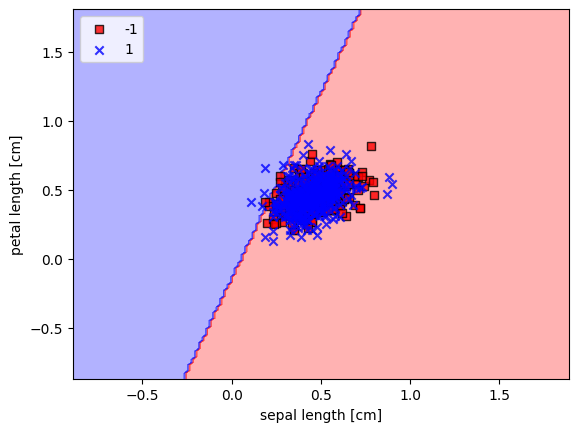

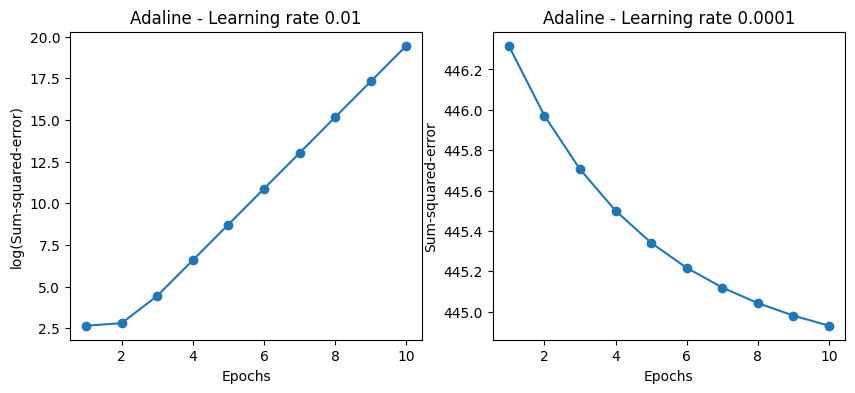

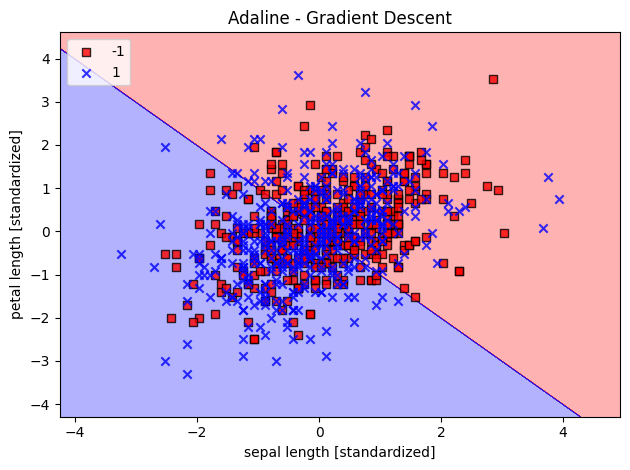

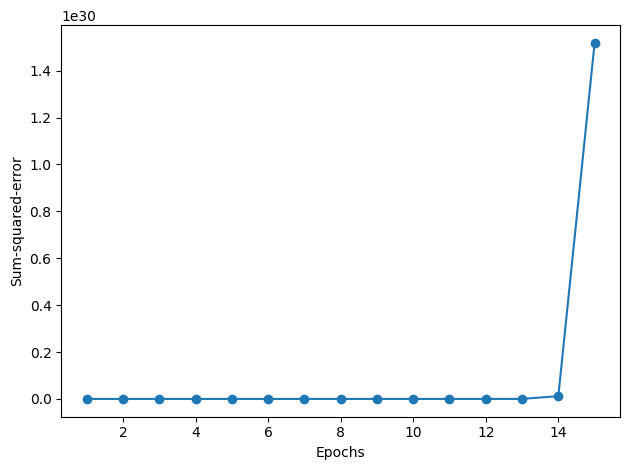

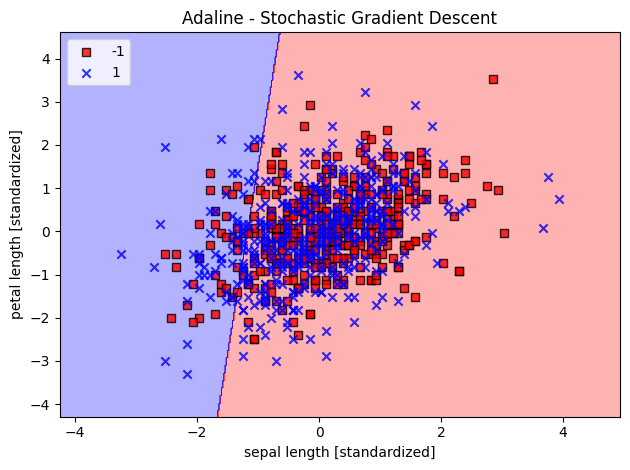

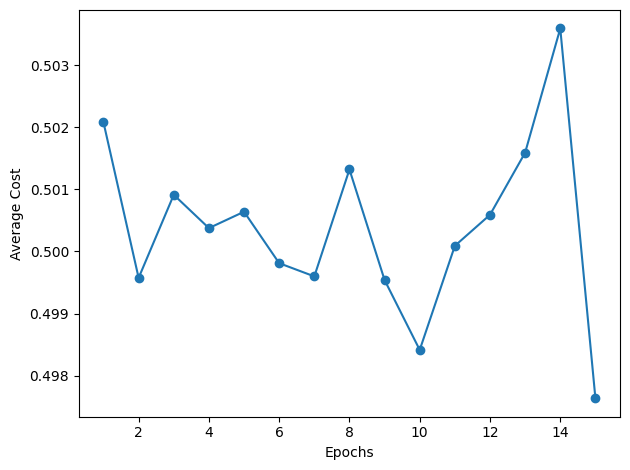

In [ ]:
import numpy as np  # operaciones con matrices
import pandas as pd # Para manipulación y análisis de datos
import matplotlib.pyplot as plt # Para graficar datos

class Perceptron(object): # Definir la clase Perceptron
    def __init__(self, eta=0.01, n_inter=50, random_state=1): # Se define el constructor
        self.eta = eta                    # Tasa de aprendizaje
        self.n_inter = n_inter            # Número de iteraciones (épocas)
        self.random_state = random_state  # Estado aleatorio para inicializar pesos

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)  # Crea un generador de números aleatorios
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Pesos iniciales
        self.errors_ = []  # Lista para almacenar el número de errores por cada época.

        for _ in range(self.n_inter):  # Bucle externo sobre el número de épocas.
            errors = 0  # Resetea el contador de errores en cada época.
            for xi, target in zip(X, y):  # Bucle interno sobre todas las muestras del conjunto de datos.
                update = self.eta * (target - self.predict(xi))  # Calcula la actualización de los pesos según el error.
                self.w_[1:] += update * xi  # Actualiza los pesos correspondientes a las características.
                self.w_[0] += update  # Actualiza el sesgo del perceptrón.
                errors += int(update != 0.0)  # Cuenta los errores de predicción en esa época.
            self.errors_.append(errors)  # Guarda el número de errores al final de cada época.
        return self  # Devuelve el perceptrón entrenado.

    def net_input(self, X): #se define ner_imput
        return np.dot(X, self.w_[1:]) + self.w_[0]  # Calcula la entrada neta (producto punto de las características y pesos más el sesgo).

    def predict(self, X):  # se define predict
        return np.where(self.net_input(X) >= 0.0, 1, -1)  # Realiza la predicción comparando la entrada neta con un umbral (0).

# Cargar el conjunto de datos
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data', header=None, delim_whitespace=True)

# Seleccionar dos clases para simplificar
# La clase está en la columna 9
df = df[(df[9] == 'CYT') | (df[9] == 'NUC')]

# Convertir etiquetas a valores binarios: '
y = np.where(df[9].values == 'CYT', -1, 1)

# Extraer dos característica
X = df.iloc[:, [1, 2]].values

# Graficar los datos
plt.scatter(X[y == -1, 0], X[y == -1, 1], color='green', marker='o', label='CYT')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='red', marker='x', label='NUC')

plt.xlabel('Característica 1') #etiqueta eje x
plt.ylabel('Característica 2')  #etiqueta eje y
plt.legend(loc='upper left')
plt.show()  #muestra el grafico generado

# Entrenar el modelo de perceptrón
ppn = Perceptron(eta=0.1, n_inter=10)  # Tasa de aprendizaje 0.1 y 10 épocas
ppn.fit(X, y)  # Ajustar el modelo con los datos X e y

# Graficar los errores durante las épocas
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()  #muestra el grafico generado


##########--------------------------------------------------------##############


# Mapa
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # definir un generador de marcadores y un mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # representar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # representar muestras de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()


#Adeline
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Ten en cuenta que el método "activación" no produce ningún efecto
            # sobre el código, puesto que es simplemente una función de identidad.
            # En su lugar, podemos escribir directamente `output = self.net_input(X)`.
            # El objetivo de la activación es más conceptual, por ejemplo,
            # en el caso de una regresión logística (como veremos más tarde),
            # podríamos cambiarla a
            # una función sigmoide para implementar un clasificador de regresión logística.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

# In[19]:
# ## Mejorar el descenso de gradiente mediante el escalado de características
# In[20]:
# In[21]:
# estandarizar características
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

# In[22]:

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

# ## Aprendizaje automático a gran escala y descenso de gradiente estocástico
# In[23]:

class AdalineSGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    shuffle : bool (default: True)
      Shuffles training data every epoch if True to prevent cycles.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value averaged over all
      training samples in each epoch.


    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

# In[24]:

ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

# In[25]:

ada.partial_fit(X_std[0, :], y[0])

# # Resumen
# ...
# ---
#
# El lector puede omitir las siguientes celdas
# In[9]:
# In[ ]: